In [1]:
# Let's import the libraries we need
import time # Naming file
import pandas as pd # Create dataframe 
from bs4 import BeautifulSoup as bs # Parse HTML
import ipynb.fs.full.web_scraping_streeteasy as se # Functions from the other workbook

# Before using the driver, you need to download the HEX editor
# Inside the HEX editor, open the chromedriver.exe and change the '$cdc_' variable to 'xxxx'
# Locate the directory path to your chromedriver
# Depending on the location you are searching, I had to pass 5 of the CAPTCHA test in total when I searched Brooklyn
# The CAPTCHA test will pop up every 60-70 pages
driver = se.init_driver("C:/Users/Richard Cheung/Downloads/chromedriver_win32/chromedriver/chromedriver.exe")

# Type the city/neigborhood name that you are looking for
# If there is a space inbetween the location name, substitue the space with an hyphen e.g. "dyker-height"
# If you are searching for multiple locations, you will have to use area codes instead of location names
location = "brooklyn"

# Immediately disable cookies after the browser window opens
# Otherwise, you won't be able to access the link EVEN if you pass the CAPTCHA test
# If you are looking for rentals instead of sales, simply change 'for-sale' to 'for-rent' in the link below
se.navigate_to_website(driver, "https://streeteasy.com/for-sale/" + location)

# Collect the extracted data
output_data = []

if se.test_for_no_results(driver):
    print("No results. You probably mistyped the location name")
    
raw_data = se.get_html(driver)
print("%s pages of listings found" % str(len(raw_data)))

listings = se.get_listings(raw_data)
print("%s home listings scraped\n***" % str(len(listings)))

for home in listings:
    soup = bs(home, "lxml")
    new_obs = []
    
    card_info = se.get_card_info(soup)
    
    new_obs.append(se.get_street_address(soup))
    new_obs.append(se.get_neighborhood(soup))
    new_obs.append(se.get_price(soup))
    new_obs.append(se.get_bedrooms(card_info))
    new_obs.append(se.get_bathrooms(card_info))
    new_obs.append(se.get_sqft(card_info))
    new_obs.append(se.get_saleType(soup))
    new_obs.append(se.get_url(soup))
    
    output_data.append(new_obs)
    
se.close_connection(driver)

file_name = "%s_%s.csv" % (str(time.strftime("%Y-%m-%d")),
                           str(time.strftime("%H%M%S")))

columns = ["Address", "Neighborhood", "Price", "Bedrooms",
           "Bathrooms", "sqft", "Sale Type", "URL"]

scraped_data = pd.DataFrame(output_data,
                            columns = columns)

# Write the data into a csv file
scraped_data.to_csv(file_name,
                    index = False,
                    encoding = "UTF-8")


CAPTCHA!
Manually complete the captcha requirements.
Once that's done, it should resume scraping after ~30 seconds.

CAPTCHA!
Manually complete the captcha requirements.
Once that's done, it should resume scraping after ~30 seconds.

CAPTCHA!
Manually complete the captcha requirements.
Once that's done, it should resume scraping after ~30 seconds.

CAPTCHA!
Manually complete the captcha requirements.
Once that's done, it should resume scraping after ~30 seconds.

CAPTCHA!
Manually complete the captcha requirements.
Once that's done, it should resume scraping after ~30 seconds.
359 pages of listings found
4656 home listings scraped
***


In [3]:
# Let's do some analysis on the data that we scraped
scraped_data.head()

,Address,Neighborhood,Price,Bedrooms,Bathrooms,sqft,Sale Type,URL
0,2935 West 5th Street #18E,Coney Island,329000.0,1,1,725,Co-op,NA
1,544 88th Street #1F,Fort Hamilton,335000.0,1,1,NA,Co-op,NA
2,970 41st Street #3A #3A,Borough Park,500000.0,2,1,770,Condo,https://www.streeteasy.com/building/4102-new-u...
3,897 Empire Boulevard #C3,Weeksville,189000.0,1,1,550,Co-op,https://www.streeteasy.com/building/897-empire...
4,2940 West 5th Street #6C,Coney Island,419000.0,2,1,1000,Co-op,https://www.streeteasy.com/building/trump-vill...


In [18]:
data = scraped_data
data.shape

(4656, 8)

In [15]:
# I realized some of the neigborhood names aren't reported consistently on StreetEasy
# Let's fix the neighborhood names
data['Neighborhood'] = data['Neighborhood'].map(lambda x: x.lstrip())
data['Neighborhood'] = data['Neighborhood'].map(lambda x: x.replace("fvtabqxeexc", ""))
print(data['Neighborhood'].value_counts())

Williamsburg                       262
Park Slope                         193
Gravesend                          171
Bushwick                           162
Brooklyn Heights                   155
Crown Heights                      152
Bedford-Stuyvesant                 150
Stuyvesant Heights                 149
Sheepshead Bay                     135
East Flatbush                      133
Homecrest                          131
Downtown Brooklyn                  129
Fort Hamilton                      127
Greenpot                           127
Bay Ridge                          127
Canarsie                           121
Brighton Beach                     121
East New York                      116
Midwood                            101
Bensonhurst                         97
Clton Hill                          96
Sunset Park                         95
Coney Island                        87
Flatbush                            81
Kensgton                            80
Carroll Gardens          

In [17]:
# There are many duplicated listings
# Let's get rid of them
data['Address'].duplicated().value_counts()

False    3860
True      796
Name: Address, dtype: int64

In [20]:
data = data.drop_duplicates(subset=['Address'],
                            keep='first')
data.shape

(3860, 8)

In [27]:
# Some of the neighborhood names are vague or missing lettters
# I had to verify their address and neighborhood on Google Map
# Let's correct the neighborhood names
data.loc[data['Neighborhood'] == 'Wgate', 'Neighborhood'] = 'East Flatbush'
data.loc[data['Neighborhood'] == 'Weeksville', 'Neighborhood'] = 'Crown Heights'
data.loc[data['Neighborhood'] == 'Vegar Hill', 'Neighborhood'] = 'Vinegar Hill'
data.loc[data['Neighborhood'] == 'Fiske Terrace', 'Neighborhood'] = 'Ditmas Park'
data.loc[data['Neighborhood'] == 'City Le', 'Neighborhood'] = 'Cypress Hills'
data.loc[data['Neighborhood'] == 'Mill Bas', 'Neighborhood'] = 'Mill Basin'
data.loc[data['Neighborhood'] == 'Old Mill Bas', 'Neighborhood'] = 'Mill Basin'
data.loc[data['Neighborhood'] == 'Kensgton', 'Neighborhood'] = 'Kensington'
data.loc[data['Neighborhood'] == 'New Lots', 'Neighborhood'] = 'East New York'

C:\Users\Richard Cheung\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [38]:
# The ones with neigborhood name, "Brooklyn", disperse all over the Google Map
# Instead of correcting each of them, Let's get rid of them
new_data = data[data.Neighborhood != 'Brooklyn']
print(new_data.shape)
new_data.head()

(3844, 8)

In [66]:
# Let's look at the different sale type of the listings
new_data['Sale Type'].value_counts()

Condo           1081
Multi-family    1016
House            853
Co-op            625
Townhouse        166
Building          79
Condop            18
Other              6
Name: Sale Type, dtype: int64

In [69]:
# We will split the data based on their sale type to get the average price on each sale type
# We will leave out Condop and Other because all the Condop listings are still under development,
# and the Other sale type has only 6 listings
condo_data = new_data[new_data['Sale Type'] == 'Condo']
condo_data.head()

,Address,Neighborhood,Price,Bedrooms,Bathrooms,sqft,Sale Type,URL
2,970 41st Street #3A #3A,Borough Park,500000.0,2,1,770,Condo,https://www.streeteasy.com/building/4102-new-u...
10,1496 Bedford Avenue #1C,Crown Heights,800000.0,2,15,1098,Condo,https://www.streeteasy.com/building/1496-bedfo...
14,105 Saint Marks Place #4,Park Slope,825000.0,1,1,560,Condo,NA
16,710 Grand Street #3R,Williamsburg,675000.0,1,1,565,Condo,https://www.streeteasy.com/building/710-grand-...
17,710 Grand Street #2R,Williamsburg,895000.0,1,1,551,Condo,https://www.streeteasy.com/building/710-grand-...


In [70]:
coop_data = new_data[new_data['Sale Type'] == 'Co-op']
coop_data.head()

,Address,Neighborhood,Price,Bedrooms,Bathrooms,sqft,Sale Type,URL
0,2935 West 5th Street #18E,Coney Island,329000.0,1,1,725,Co-op,NA
1,544 88th Street #1F,Fort Hamilton,335000.0,1,1,NA,Co-op,NA
3,897 Empire Boulevard #C3,Crown Heights,189000.0,1,1,550,Co-op,https://www.streeteasy.com/building/897-empire...
4,2940 West 5th Street #6C,Coney Island,419000.0,2,1,1000,Co-op,https://www.streeteasy.com/building/trump-vill...
5,2944 West 5th Street #18E,Coney Island,375000.0,2,1,925,Co-op,https://www.streeteasy.com/building/trump-vill...


In [72]:
build_data = new_data[new_data['Sale Type'] == 'Building']
build_data.head()

,Address,Neighborhood,Price,Bedrooms,Bathrooms,sqft,Sale Type,URL
51,203-205 Norman Avenue,Greenpot,8950000.0,32,27,14784,Building,https://www.streeteasy.com/sale/1359559
118,599-601 Hancock Street,Stuyvesant Heights,4500000.0,16,105,8400,Building,NA
140,845 Dean Street,Crown Heights,330000.0,NA,1,NA,Building,https://www.streeteasy.com/sale/1359234
372,720 55th Street,Sunset Park,4800000.0,NA,1,NA,Building,https://www.streeteasy.com/sale/1358290
436,8508 21st Avenue #1,Bensonhurst,3500000.0,8,25,NA,Building,https://www.streeteasy.com/building/8508-21-av...


In [78]:
house_data = new_data[new_data['Sale Type'].isin(['House','Multi-family','Townhouse'])]
house_data.head()

,Address,Neighborhood,Price,Bedrooms,Bathrooms,sqft,Sale Type,URL
6,460 Willoughby Avenue,Bedford-Stuyvesant,1850000.0,5,2,NA,Multi-family,https://www.streeteasy.com/building/460-willou...
7,951 71st Street,Dyker Heights,1620000.0,8,3,2200,House,https://www.streeteasy.com/sale/1359710
8,75 Truxton Street,Ocean Hill,999999.0,6,2,2970,Multi-family,https://www.streeteasy.com/sale/1359707
9,1034 76th Street,Dyker Heights,999000.0,3,15,1783,House,https://www.streeteasy.com/sale/1359705
11,2148 East 28th Street,Homecrest,659000.0,3,15,1259,House,https://www.streeteasy.com/sale/1359702


In [41]:
# We will use this function to get the aggregated statistic on neighborhood
def agg_numeric(df, group_var, df_name):
    
    agg = df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
    
    columns = [group_var]
    
    for var in agg.columns.levels[0]:
        
        if var != group_var:
            
            for stat in agg.columns.levels[1][:-1]:
                
                columns.append('%s_%s_%s' % (df_name, var, stat))
                
    agg.columns = columns
    
    return agg

In [76]:
agg_condo_data = agg_numeric(condo_data, group_var = 'Neighborhood', df_name = 'Condo')
agg_coop_data = agg_numeric(coop_data, group_var = 'Neighborhood', df_name = 'Co-op')
agg_build_data = agg_numeric(build_data, group_var = 'Neighborhood', df_name = 'Building')
agg_house_data = agg_numeric(house_data, group_var = 'Neighborhood', df_name = 'Housing')

In [94]:
# Highest average price on top of the table
agg_condo_data = agg_condo_data.sort_values(by='Condo_Price_mean', ascending = False)
agg_coop_data = agg_coop_data.sort_values(by='Co-op_Price_mean', ascending = False)
agg_build_data = agg_build_data.sort_values(by='Building_Price_mean', ascending = False)
agg_house_data = agg_house_data.sort_values(by='Housing_Price_mean', ascending = False)

In [85]:
# We will look at the listing counts of each neighborhood in each sale type
agg_condo_data.sort_values(by='Condo_Price_count')

,Neighborhood,Condo_Price_count,Condo_Price_mean,Condo_Price_max,Condo_Price_min,Condo_Price_sum
34,Madison,1,6.990000e+05,699000.0,699000.0,699000.0
25,Flatlands,2,3.820000e+05,435000.0,329000.0,764000.0
35,Mapleton,2,8.485000e+05,999000.0,698000.0,1697000.0
47,Vinegar Hill,3,1.040000e+06,1150000.0,975000.0,3120000.0
36,Mare Park,4,4.950000e+05,530000.0,470000.0,1980000.0
18,Ditmas Park,5,7.266996e+05,1125500.0,179999.0,3633498.0
43,Seagate,5,5.412000e+05,699000.0,399000.0,2706000.0
21,East Flatbush,5,5.607998e+05,830000.0,350000.0,2803999.0
39,Ocean Parkway,5,6.876000e+05,1149000.0,420000.0,3438000.0
42,Prospect Lefferts Gardens,5,7.158000e+05,805000.0,549000.0,3579000.0


In [86]:
agg_coop_data.sort_values(by='Co-op_Price_count')

,Neighborhood,Co-op_Price_count,Co-op_Price_mean,Co-op_Price_max,Co-op_Price_min,Co-op_Price_sum
29,Mare Park,1,1.850000e+05,185000.0,185000.0,185000.0
18,East New York,1,1.900000e+05,190000.0,190000.0,190000.0
28,Mapleton,1,2.090000e+05,209000.0,209000.0,209000.0
4,Borough Park,1,5.600000e+05,560000.0,560000.0,560000.0
8,Canarsie,1,2.200000e+05,220000.0,220000.0,220000.0
20,Flatlands,1,3.250000e+05,325000.0,325000.0,325000.0
31,Mill Basin,2,2.085000e+05,228000.0,189000.0,417000.0
24,Greenpot,2,8.650000e+05,1350000.0,380000.0,1730000.0
16,Dyker Heights,2,2.940000e+05,338000.0,250000.0,588000.0
38,Stuyvesant Heights,2,4.120000e+05,435000.0,389000.0,824000.0


In [87]:
agg_build_data.sort_values(by='Building_Price_count')

,Neighborhood,Building_Price_count,Building_Price_mean,Building_Price_max,Building_Price_min,Building_Price_sum
11,Dyker Heights,1,4.099900e+04,40999.0,40999.0,40999.0
4,Boerum Hill,1,4.000000e+06,4000000.0,4000000.0,4000000.0
8,Columbia St Waterfront District,1,2.800000e+06,2800000.0,2800000.0,2800000.0
16,Flatlands,1,2.300000e+06,2300000.0,2300000.0,2300000.0
23,Prospect Heights,1,1.849000e+06,1849000.0,1849000.0,1849000.0
15,Flatbush,1,1.799999e+06,1799999.0,1799999.0,1799999.0
20,Mare Park,1,1.699000e+06,1699000.0,1699000.0,1699000.0
14,East Williamsburg,1,2.300000e+07,23000000.0,23000000.0,23000000.0
0,Bath Beach,1,1.500000e+06,1500000.0,1500000.0,1500000.0
21,Midwood,1,1.499000e+06,1499000.0,1499000.0,1499000.0


In [88]:
agg_house_data.sort_values(by='Housing_Price_count')

,Neighborhood,Housing_Price_count,Housing_Price_mean,Housing_Price_max,Housing_Price_min,Housing_Price_sum
19,DUMBO,1,4.995000e+06,4995000.0,4995000.0,4995000.0
21,Downtown Brooklyn,1,3.750000e+06,3750000.0,3750000.0,3750000.0
15,Columbia St Waterfront District,5,3.117000e+06,3400000.0,2995000.0,15584999.0
18,Cypress Hills,5,9.092000e+05,1150000.0,599000.0,4546000.0
49,Prospect Park South,5,2.305800e+06,2879000.0,2000000.0,11529000.0
47,Prospect Heights,6,3.073667e+06,3995000.0,1749000.0,18442000.0
16,Coney Island,7,8.908571e+05,1700000.0,570000.0,6236000.0
25,East Williamsburg,8,2.290750e+06,4500000.0,1235000.0,18326000.0
14,Cobble Hill,9,5.146556e+06,12500000.0,2925000.0,46319000.0
38,Madison,13,1.360692e+06,1800000.0,788000.0,17689000.0


In [96]:
# let's eliminate the neighborhoods with listings counts less than 5
agg_condo_data = agg_condo_data[agg_condo_data['Condo_Price_count'] >= 5]
agg_coop_data = agg_coop_data[agg_coop_data['Co-op_Price_count'] >= 5]
agg_build_data = agg_build_data[agg_build_data['Building_Price_count'] >= 2]
agg_house_data = agg_house_data[agg_house_data['Housing_Price_count'] >= 5]

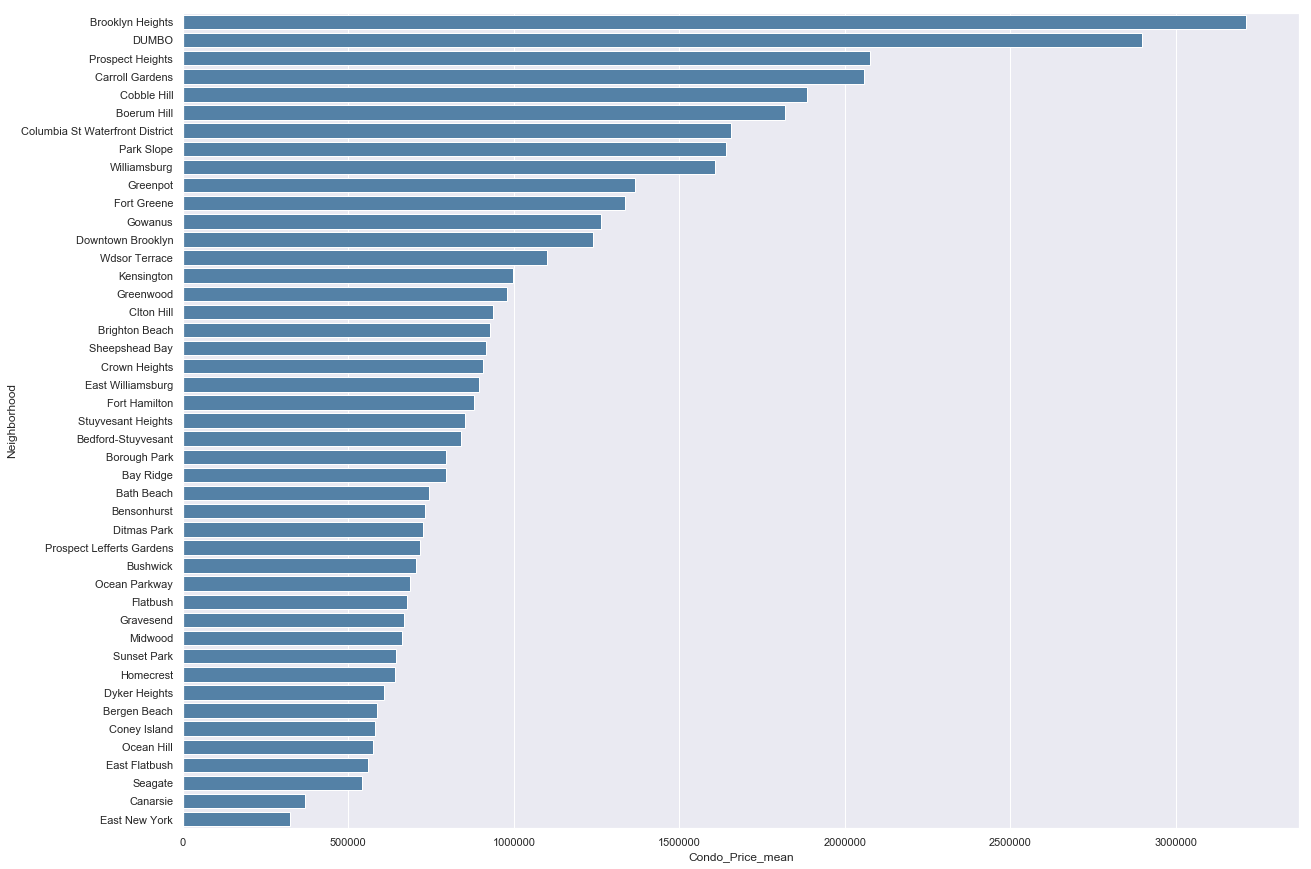

In [106]:
# As a final step, we visualize the data using bar chart
# Brooklyn Heights seems like it is the most expensive neighborhood in Brooklyn!
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))

sns.set(style="darkgrid")
Condo = sns.barplot(x="Condo_Price_mean", 
                    y="Neighborhood", 
                    data=agg_condo_data, 
                    color = 'steelblue')

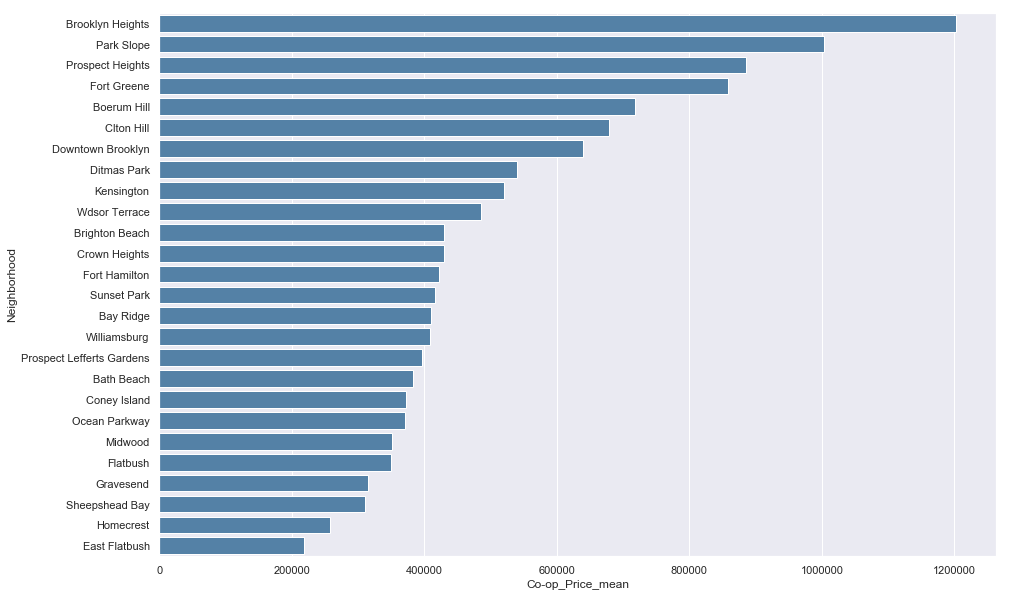

In [101]:
plt.figure(figsize=(15,10))
Coop = sns.barplot(x="Co-op_Price_mean", 
                   y="Neighborhood", 
                   data=agg_coop_data, 
                   color = 'steelblue')

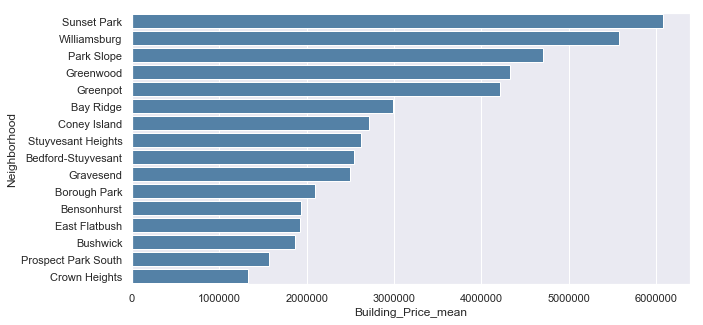

In [103]:
plt.figure(figsize=(10,5))
Build = sns.barplot(x="Building_Price_mean", 
                    y="Neighborhood", 
                    data=agg_build_data, 
                    color = 'steelblue')

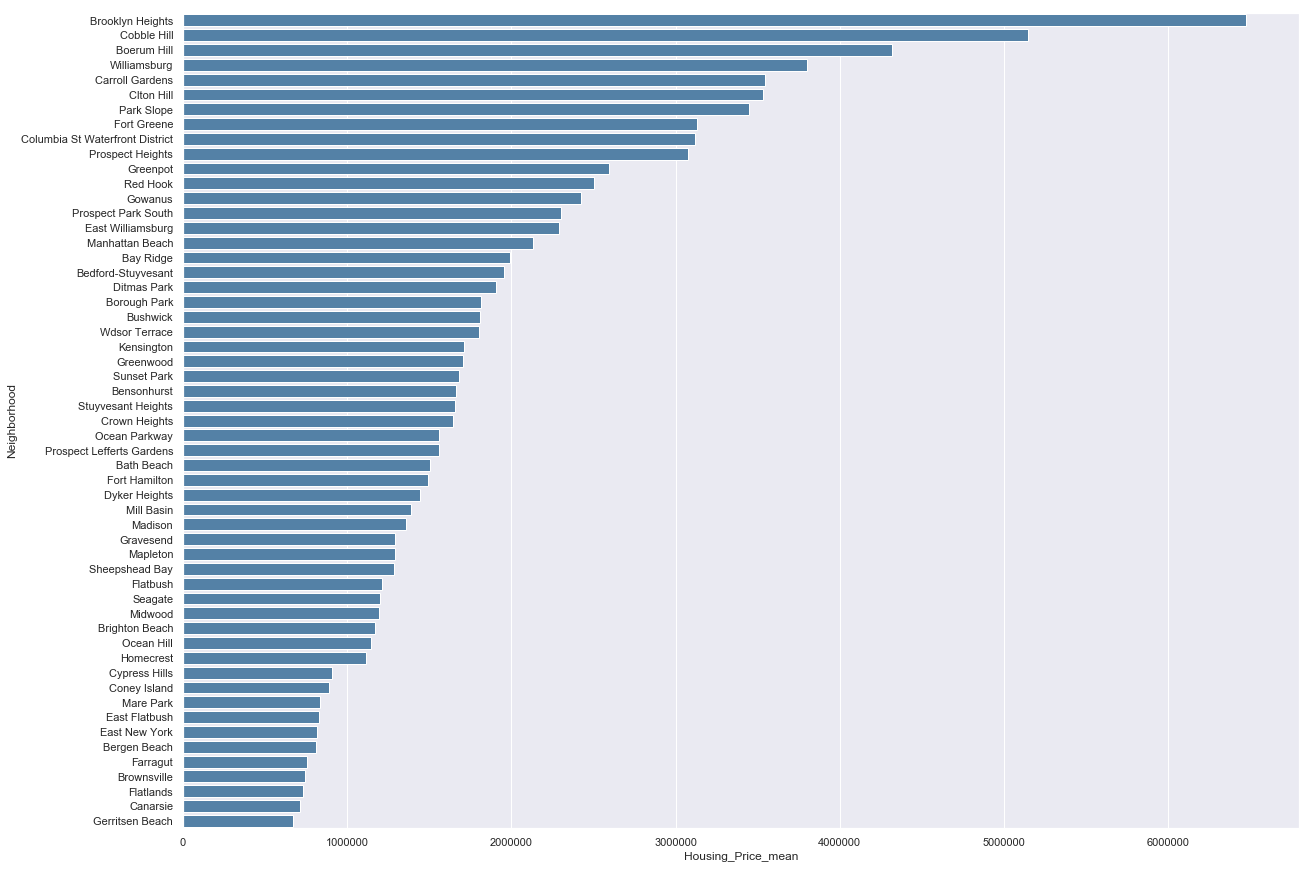

In [104]:
plt.figure(figsize=(20,15))
House = sns.barplot(x="Housing_Price_mean", 
                    y="Neighborhood", 
                    data=agg_house_data, 
                    color = 'steelblue')